In [198]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv
import seaborn as sns
import matplotlib.pyplot as plt
import missingno

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [199]:
train = pd.read_csv("/kaggle/input/titanic/train.csv")
test = pd.read_csv("/kaggle/input/titanic/test.csv")

all_data = pd.concat([train,test])

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [200]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


**Data Visualization**

In [201]:
print("Train shape: ",train.shape)
print("Test shape: ",test.shape)

Train shape:  (891, 12)
Test shape:  (418, 11)


In [202]:
train.info()
print("="*50)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass  

In [203]:
train_num = train[["PassengerId","SibSp","Age","Fare"]]
train_cat = train[["Pclass","Survived","Ticket","Sex","Embarked","Cabin"]]

             PassengerId     SibSp       Age      Fare
PassengerId     1.000000 -0.057527  0.036847  0.012658
SibSp          -0.057527  1.000000 -0.308247  0.159651
Age             0.036847 -0.308247  1.000000  0.096067
Fare            0.012658  0.159651  0.096067  1.000000


<Axes: >

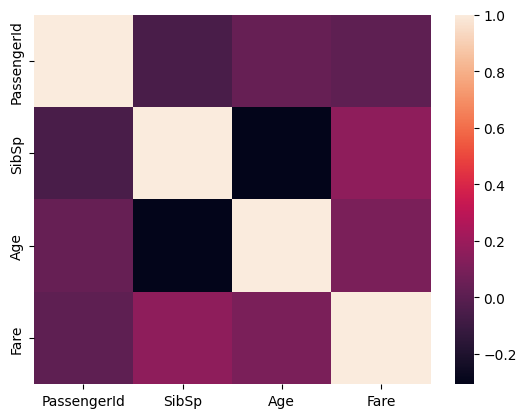

In [204]:
print(train_num.corr())
sns.heatmap(train_num.corr())

In [205]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [206]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [207]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

<Axes: >

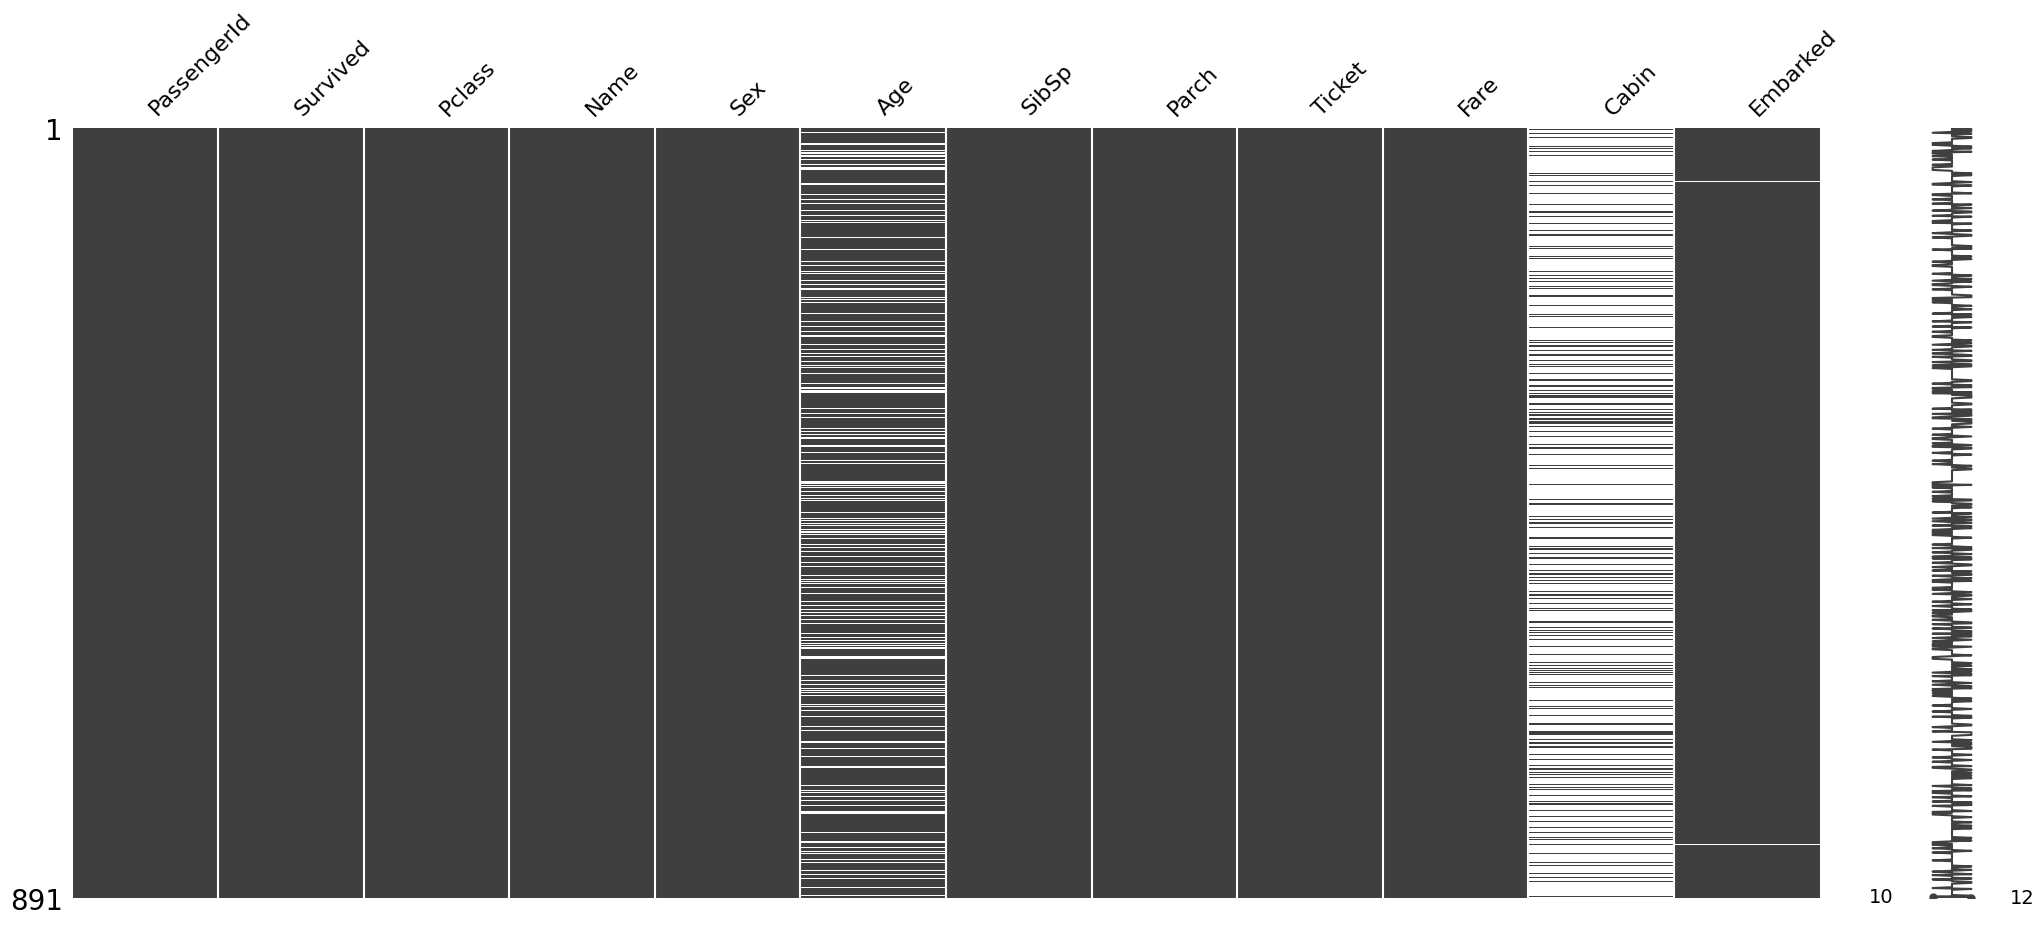

In [208]:
missingno.matrix(train)

In [209]:
train["Sex"].value_counts(dropna = False)

Sex
male      577
female    314
Name: count, dtype: int64

In [210]:
train[["Sex","Survived"]].groupby("Sex").mean().sort_values(by = "Survived")

,Survived
Sex,
male,0.188908
female,0.742038


Text(0.5, 1.0, 'Survival rate by Gender')

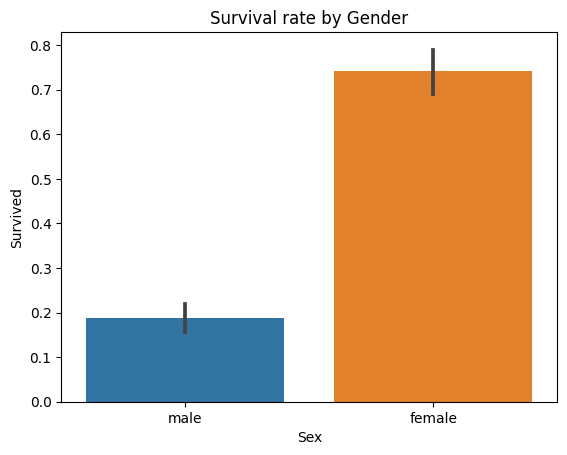

In [211]:
sns.barplot(x= "Sex", y="Survived" , data = train)
plt.title("Survival rate by Gender")

In [212]:
train["Pclass"].value_counts(dropna = False)

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [213]:
train[["Pclass","Survived"]].groupby("Pclass").mean().sort_values(by = "Survived")

,Survived
Pclass,
3,0.242363
2,0.472826
1,0.629630


Text(0.5, 1.0, 'Survival rate by Class')

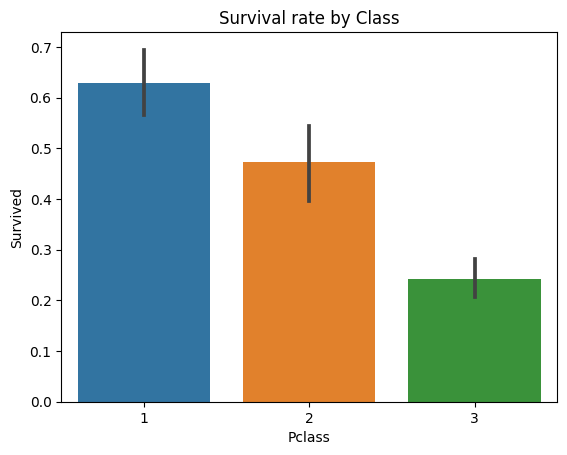

In [214]:
sns.barplot(x= "Pclass", y="Survived" , data = train)
plt.title("Survival rate by Class")

In [215]:
train["Embarked"].value_counts(dropna = False)

Embarked
S      644
C      168
Q       77
NaN      2
Name: count, dtype: int64

In [216]:
train[["Embarked","Survived"]].groupby("Embarked").mean().sort_values(by = "Survived")

,Survived
Embarked,
S,0.336957
Q,0.389610
C,0.553571


Text(0.5, 1.0, 'Survival rate by Embarked')

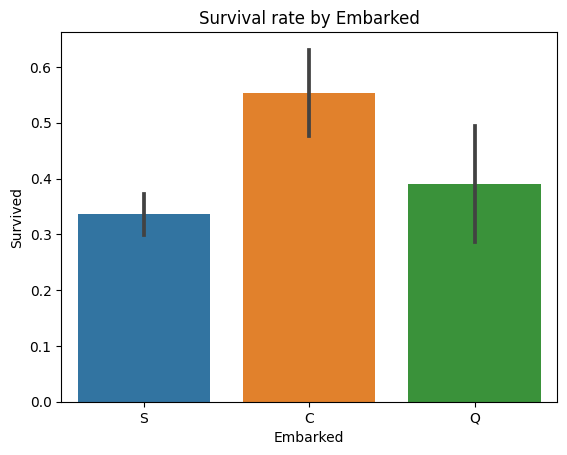

In [217]:
sns.barplot(x= "Embarked", y="Survived" , data = train)
plt.title("Survival rate by Embarked")

In [218]:
# compare survival rate across Age, SibSp, Parch, and Fare 
pd.pivot_table(train, index = 'Survived', values = ['Age','SibSp','Parch','Fare'])

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.626179,22.117887,0.329690,0.553734
1,28.343690,48.395408,0.464912,0.473684


In [219]:
# Comparing survival and each of these categorical variables 
print(pd.pivot_table(train, index = 'Survived', columns = 'Pclass', values = 'Ticket' ,aggfunc ='count'))
print()
print(pd.pivot_table(train, index = 'Survived', columns = 'Sex', values = 'Ticket' ,aggfunc ='count'))
print()
print(pd.pivot_table(train, index = 'Survived', columns = 'Embarked', values = 'Ticket' ,aggfunc ='count'))

Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119

Sex       female  male
Survived              
0             81   468
1            233   109

Embarked   C   Q    S
Survived             
0         75  47  427
1         93  30  217


In [220]:
all_data.Age = all_data.Age.fillna(train.Age.median())
all_data.Fare = all_data.Fare.fillna(train.Fare.median())
all_data.dropna(subset=['Embarked'],inplace = True)
all_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,28.0,0,0,A.5. 3236,8.0500,NaN,S
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,NaN,3,"Ware, Mr. Frederick",male,28.0,0,0,359309,8.0500,NaN,S


<Axes: >

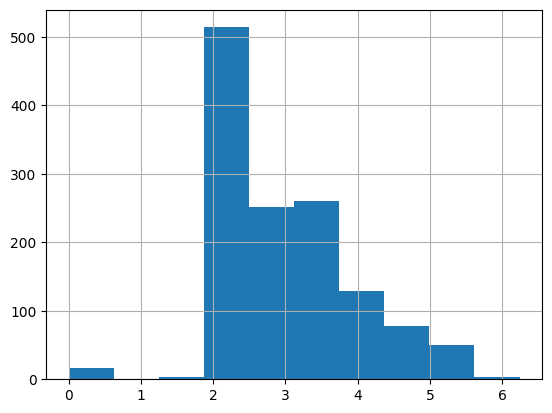

In [221]:
# log norm of fare (used)
all_data['norm_fare'] = np.log(all_data.Fare+1)
all_data['norm_fare'].hist()

In [222]:
# converted fare to category for pd.get_dummies()
all_data.Pclass = all_data.Pclass.astype(str)

**Imports**

In [223]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

**Splitting Data**

In [224]:
y_train = train["Survived"]
features = ["Pclass", "Sex", "SibSp", "Parch"]
X_train = pd.get_dummies(train[features])
X_test = pd.get_dummies(test[features])

In [225]:
# Ensure X_test has the same columns as X (account for missing dummies)
X_test = X_test.reindex(columns=X.columns, fill_value=0)

**Random Forest Classifier**

In [226]:
rf_model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)

# Train the model
rf_model.fit(X, y)
rf_predictions = rf_model.predict(X_test)

In [227]:
# Evaluate on training data
rf_train_preds = rf_model.predict(X)
rf_accuracy = accuracy_score(y, rf_train_preds)
rf_f1 = f1_score(y, rf_train_preds)

In [228]:
# Print metrics
print(f"Accuracy: {rf_accuracy:.2f}")
print(f"F1 Score: {rf_f1:.2f}")

# Print predictions
print("PID       Survival")
for pid, survival in zip(test["PassengerId"], rf_predictions):
    print(f"{pid:<10} {survival}")

Accuracy: 0.82
F1 Score: 0.74
PID       Survival
892        0
893        1
894        0
895        0
896        1
897        0
898        1
899        0
900        1
901        0
902        0
903        0
904        1
905        0
906        1
907        1
908        0
909        0
910        1
911        1
912        0
913        0
914        1
915        0
916        1
917        0
918        1
919        0
920        0
921        0
922        0
923        0
924        0
925        0
926        0
927        0
928        1
929        1
930        0
931        0
932        0
933        0
934        0
935        1
936        1
937        0
938        0
939        0
940        1
941        1
942        0
943        0
944        1
945        1
946        0
947        0
948        0
949        0
950        0
951        1
952        0
953        0
954        0
955        1
956        1
957        1
958        1
959        0
960        0
961        1
962        1
963        0
964        1
96

**Logistic Regression**

In [229]:
lr_model = LogisticRegression(max_iter=200, random_state=1)

# Train the model
lr_model.fit(X, y)
lr_predictions = lr_model.predict(X_test)

In [230]:
# Evaluate on training data
lr_train_preds = lr_model.predict(X)
lr_accuracy = accuracy_score(y, lr_train_preds)
lr_f1 = f1_score(y, lr_train_preds)

In [231]:
# Print metrics
print(f"Accuracy: {lr_accuracy:.2f}")
print(f"F1 Score: {lr_f1:.2f}")

# Print predictions
print("PID       Survival")
for pid, survival in zip(test["PassengerId"], lr_predictions):
    print(f"{pid:<10} {survival}")

Accuracy: 0.80
F1 Score: 0.72
PID       Survival
892        0
893        1
894        0
895        0
896        1
897        0
898        1
899        0
900        1
901        0
902        0
903        0
904        1
905        0
906        1
907        1
908        0
909        0
910        1
911        1
912        0
913        0
914        1
915        0
916        1
917        0
918        1
919        0
920        0
921        0
922        0
923        0
924        1
925        1
926        0
927        0
928        1
929        1
930        0
931        0
932        0
933        0
934        0
935        1
936        1
937        0
938        0
939        0
940        1
941        1
942        0
943        0
944        1
945        1
946        0
947        0
948        0
949        0
950        0
951        1
952        0
953        0
954        0
955        1
956        0
957        1
958        1
959        0
960        0
961        1
962        1
963        0
964        1
96

**Decision Tree**

In [232]:
dt_model = DecisionTreeClassifier(max_depth=5, random_state=1)

In [233]:
# Train the model
dt_model.fit(X, y)
dt_predictions = dt_model.predict(X_test)

In [234]:
# Evaluate on training data
dt_train_preds = dt_model.predict(X)
dt_accuracy = accuracy_score(y, dt_train_preds)
dt_f1 = f1_score(y, dt_train_preds)

In [235]:
# Print metrics
print(f"Accuracy: {dt_accuracy:.2f}")
print(f"F1 Score: {dt_f1:.2f}")

# Print predictions
print("PID       Survival")
for pid, survival in zip(test["PassengerId"], dt_predictions):
    print(f"{pid:<10} {survival}")

Accuracy: 0.81
F1 Score: 0.72
PID       Survival
892        0
893        0
894        0
895        0
896        0
897        0
898        1
899        0
900        1
901        0
902        0
903        0
904        1
905        0
906        1
907        1
908        0
909        0
910        0
911        1
912        0
913        0
914        1
915        0
916        1
917        0
918        1
919        0
920        0
921        0
922        0
923        0
924        0
925        0
926        0
927        0
928        1
929        1
930        0
931        0
932        0
933        0
934        0
935        1
936        1
937        0
938        0
939        0
940        1
941        1
942        0
943        0
944        1
945        1
946        0
947        0
948        0
949        0
950        0
951        1
952        0
953        0
954        0
955        1
956        1
957        1
958        1
959        0
960        0
961        1
962        1
963        0
964        1
96

**Support Vector Machine**

In [236]:
svm_model = SVC(kernel="linear")

In [237]:
# Train the model
svm_model.fit(X, y)
svm_predictions = svm_model.predict(X_test)

In [238]:
# Evaluate on training data
svm_train_preds = svm_model.predict(X)
svm_accuracy = accuracy_score(y, svm_train_preds)
svm_f1 = f1_score(y, svm_train_preds)

# Print metrics
print(f"Accuracy: {svm_accuracy:.2f}")
print(f"F1 Score: {svm_f1:.2f}")

# Print predictions
print("PID       Survival")
for pid, survival in zip(test["PassengerId"], dt_predictions):
    print(f"{pid:<10} {survival}")

Accuracy: 0.79
F1 Score: 0.71
PID       Survival
892        0
893        0
894        0
895        0
896        0
897        0
898        1
899        0
900        1
901        0
902        0
903        0
904        1
905        0
906        1
907        1
908        0
909        0
910        0
911        1
912        0
913        0
914        1
915        0
916        1
917        0
918        1
919        0
920        0
921        0
922        0
923        0
924        0
925        0
926        0
927        0
928        1
929        1
930        0
931        0
932        0
933        0
934        0
935        1
936        1
937        0
938        0
939        0
940        1
941        1
942        0
943        0
944        1
945        1
946        0
947        0
948        0
949        0
950        0
951        1
952        0
953        0
954        0
955        1
956        1
957        1
958        1
959        0
960        0
961        1
962        1
963        0
964        1
96

**Gradient Boosting Classifier**

In [239]:
gbc = GradientBoostingClassifier(n_estimators=300,
                                 learning_rate=0.05,
                                 random_state=100,
                                 max_features=5 )

In [240]:
# Train the model
gbc.fit(X, y)
pred_y = gbc.predict(X_test)

In [241]:
# Evaluate on training data
gbc_train_preds = gbc.predict(X)
gbc_accuracy = accuracy_score(y, gbc_train_preds)
gbc_f1 = f1_score(y, gbc_train_preds)

# Print metrics
print(f"Accuracy: {gbc_accuracy:.2f}")
print(f"F1 Score: {gbc_f1:.2f}")

# Print predictions
print("PID       Survival")
for pid, survival in zip(test["PassengerId"], dt_predictions):
    print(f"{pid:<10} {survival}")

Accuracy: 0.82
F1 Score: 0.73
PID       Survival
892        0
893        0
894        0
895        0
896        0
897        0
898        1
899        0
900        1
901        0
902        0
903        0
904        1
905        0
906        1
907        1
908        0
909        0
910        0
911        1
912        0
913        0
914        1
915        0
916        1
917        0
918        1
919        0
920        0
921        0
922        0
923        0
924        0
925        0
926        0
927        0
928        1
929        1
930        0
931        0
932        0
933        0
934        0
935        1
936        1
937        0
938        0
939        0
940        1
941        1
942        0
943        0
944        1
945        1
946        0
947        0
948        0
949        0
950        0
951        1
952        0
953        0
954        0
955        1
956        1
957        1
958        1
959        0
960        0
961        1
962        1
963        0
964        1
96